In [1]:
import numpy as np
import pandas as pd

In [138]:
#формируем датафрейм на основание файла
hr_data = pd.read_csv('HR.csv')

### Справка по данным

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [139]:
#изучаем данные
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#проверяем типы данных
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#приведем категориальные данные к соотвествующему типу
hr_data['Work_accident'] = hr_data['Work_accident'].astype('category')
hr_data['left'] = hr_data['left'].astype('category')
hr_data['promotion_last_5years'] = hr_data['promotion_last_5years'].astype('category')
hr_data['department'] = hr_data['department'].astype('category')
hr_data['salary'] = hr_data['salary'].astype('category')

## Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [6]:
#создаем функцию для расчета оснонвых метрик
def main_merics(data_frame):
    
    """
    Функция на вход принимает датафрейм и в ответ выводит основные статистические показатели
    по его столбцам. 
    """
    
    data_frame_metrics = pd.DataFrame(columns=['name','min', 'max', 'mean', 'mode', 'median', 'std'])

    for column in  data_frame:
        
        name = column
        
        if data_frame[column].dtypes == 'category':
            min_, max_, mean_, median_, std_ = '-', '-', '-', '-', '-'
        
        else:
            min_ = data_frame[column].min()
            max_ = data_frame[column].max()
            mean_ = data_frame[column].mean()            
            median_ = data_frame[column].median()
            std_ = data_frame[column].std()
        
        mode_ = data_frame[column].mode()[0]
        data_frame_metrics.loc[ len(data_frame_metrics.index )] = [name, min_, max_, mean_, mode_, median_, std_]
    
    return data_frame_metrics

In [7]:
main_merics(hr_data)

,name,min,max,mean,mode,median,std
0,satisfaction_level,0.09,1.0,0.612834,0.1,0.64,0.248631
1,last_evaluation,0.36,1.0,0.716102,0.55,0.72,0.171169
2,number_project,2.0,7.0,3.803054,4.0,4.0,1.232592
3,average_montly_hours,96.0,310.0,201.050337,135.0,200.0,49.943099
4,time_spend_company,2.0,10.0,3.498233,3.0,3.0,1.460136
5,Work_accident,-,-,-,0.0,-,-
6,left,-,-,-,0.0,-,-
7,promotion_last_5years,-,-,-,0.0,-,-
8,department,-,-,-,sales,-,-
9,salary,-,-,-,low,-,-


## Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [9]:
import seaborn as sns

<AxesSubplot:>

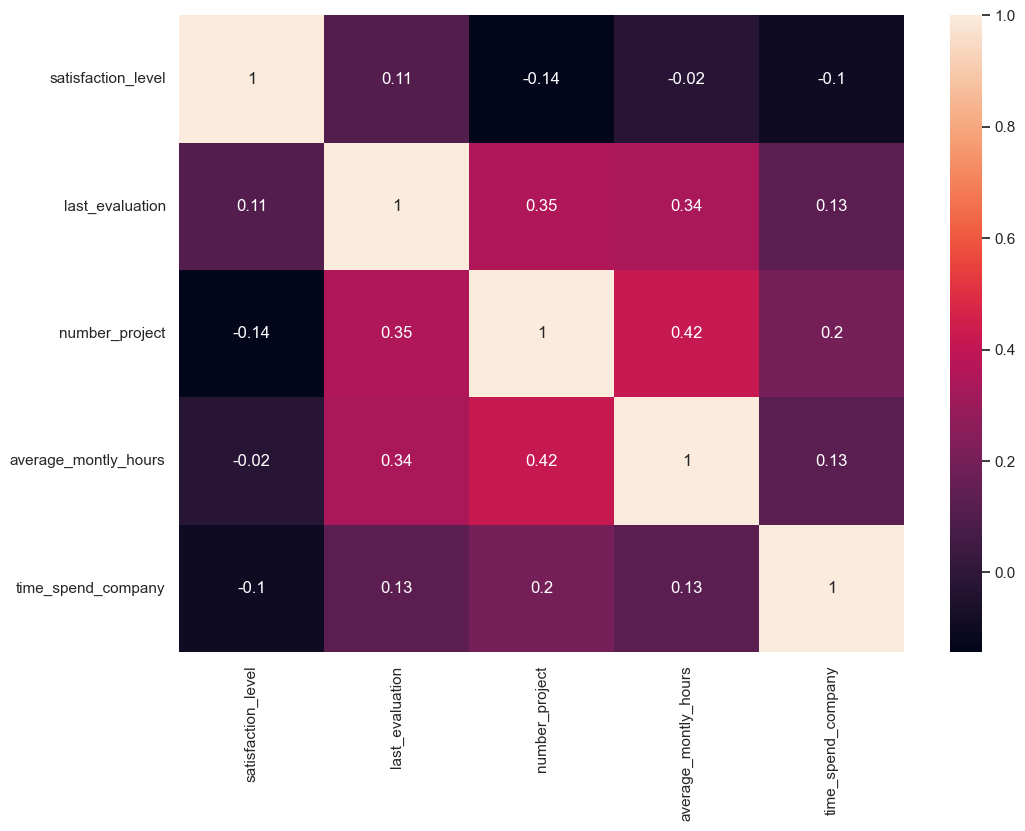

In [10]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(hr_data[[column for column in hr_data if hr_data[column].dtypes != 'category']].corr(), annot=True)

In [11]:
def corr_max_min(df):

    """
    Функция на вход принимает датафрейм и в ответ выводит пару наиболее и наименее скоррелированных переменных
    """

    corr_ = df.corr()
    
    max_ = {}
    min_ = {}

    for column in corr_: #проходимся по всем столбцам коррекляционной матрицы
        dict_ = corr_[corr_.index != column][column].abs().to_dict() #составляем словарь для каждого столбца с модулем коэффициента корреляции за исключением пересечения переменой самой с собой
        max_[(column, max(dict_, key=dict_.get))] = dict_[max(dict_, key=dict_.get)] #выбираем максимальное значение и записываем его в словарь с максимальными значениями по всем столбцам
        min_[(column, min(dict_, key=dict_.get))] = dict_[min(dict_, key=dict_.get)] #выбираем минимамльное значение и записываем его в словарь с минимамльными значениями по всем столбцам

    print(f'Две самые скоррелированные переменные {max(max_, key=max_.get)[0]} и {max(max_, key=max_.get)[1]}. Коэффициент корреляции: {round(corr_.loc[max(max_, key=max_.get)[0], max(max_, key=max_.get)[1]], 2)}')
    print(f'Две самые не скоррелированные переменные {min(min_, key=min_.get)[0]} и {min(min_, key=min_.get)[1]}. Коэффициент корреляции: {round(corr_.loc[min(min_, key=min_.get)[0], min(min_, key=min_.get)[1]], 2)}')

In [12]:
corr_max_min(hr_data)

Две самые скоррелированные переменные number_project и average_montly_hours. Коэффициент корреляции: 0.42
Две самые не скоррелированные переменные satisfaction_level и average_montly_hours. Коэффициент корреляции: -0.02


## Рассчитайте сколько сотрудников работает в каждом департаменте

In [13]:
hr_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## Показать распределение сотрудников по зарплатам.

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников'>

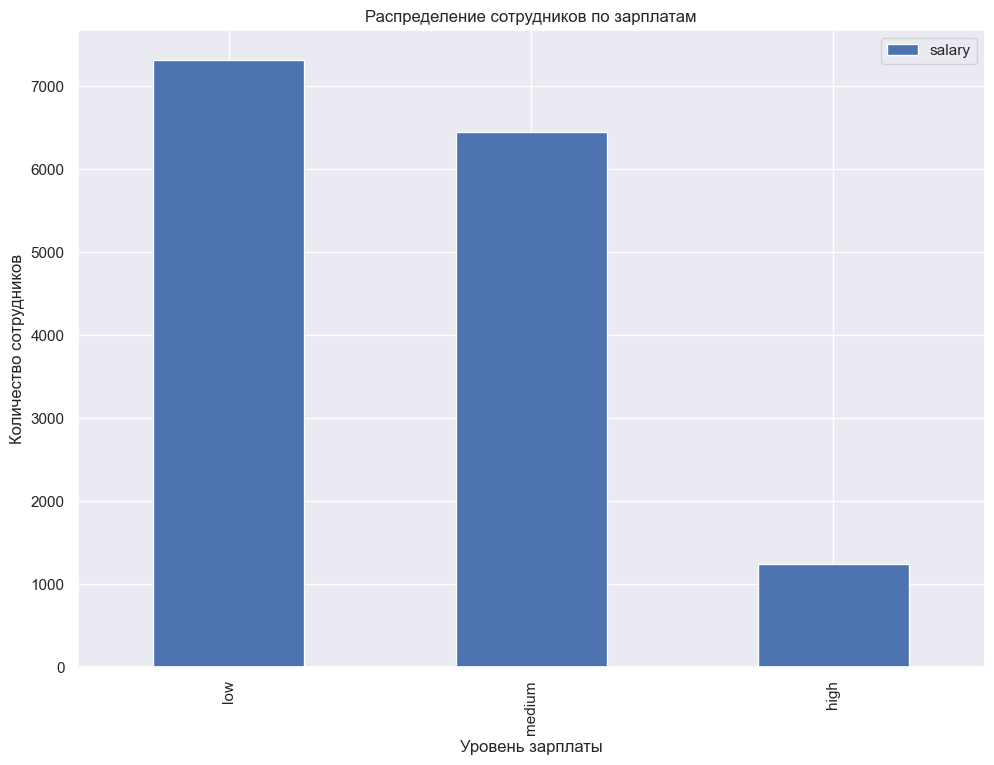

In [15]:
# визуальное представление
pd.DataFrame(hr_data['salary'].value_counts()).plot(kind='bar', 
                                                                  title='Распределение сотрудников по зарплатам',
                                                                  xlabel='Уровень зарплаты',
                                                                  ylabel='Количество сотрудников')

In [16]:
# табличное представление
pd.DataFrame(hr_data['salary'].value_counts())

,salary
low,7316
medium,6446
high,1237


## Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

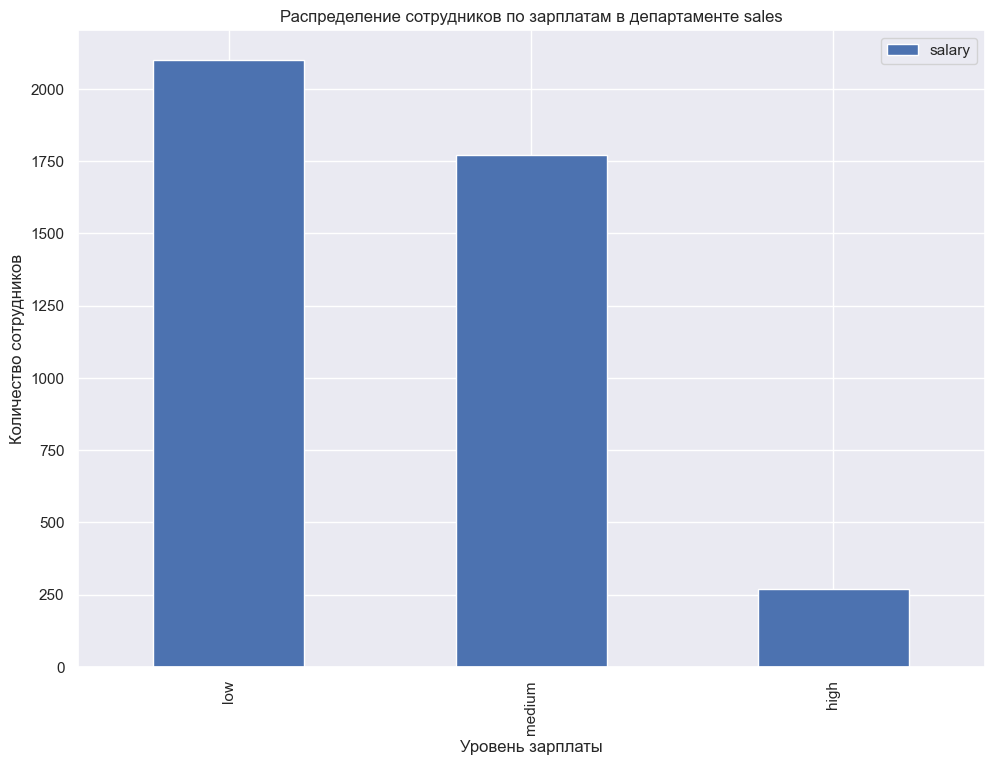

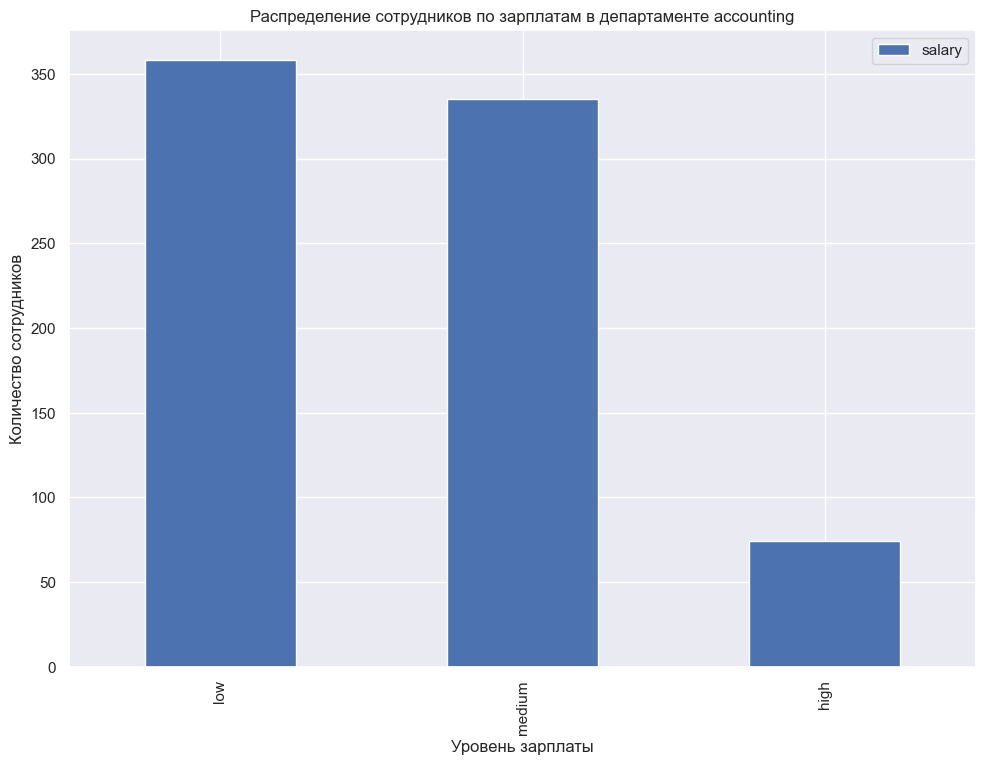

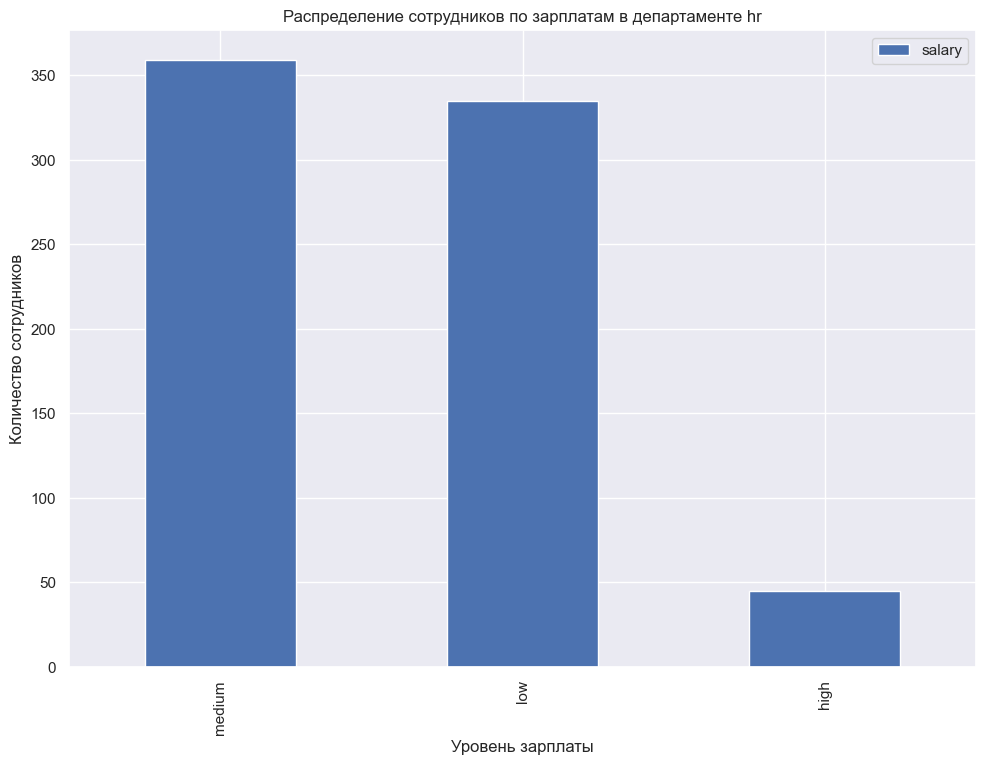

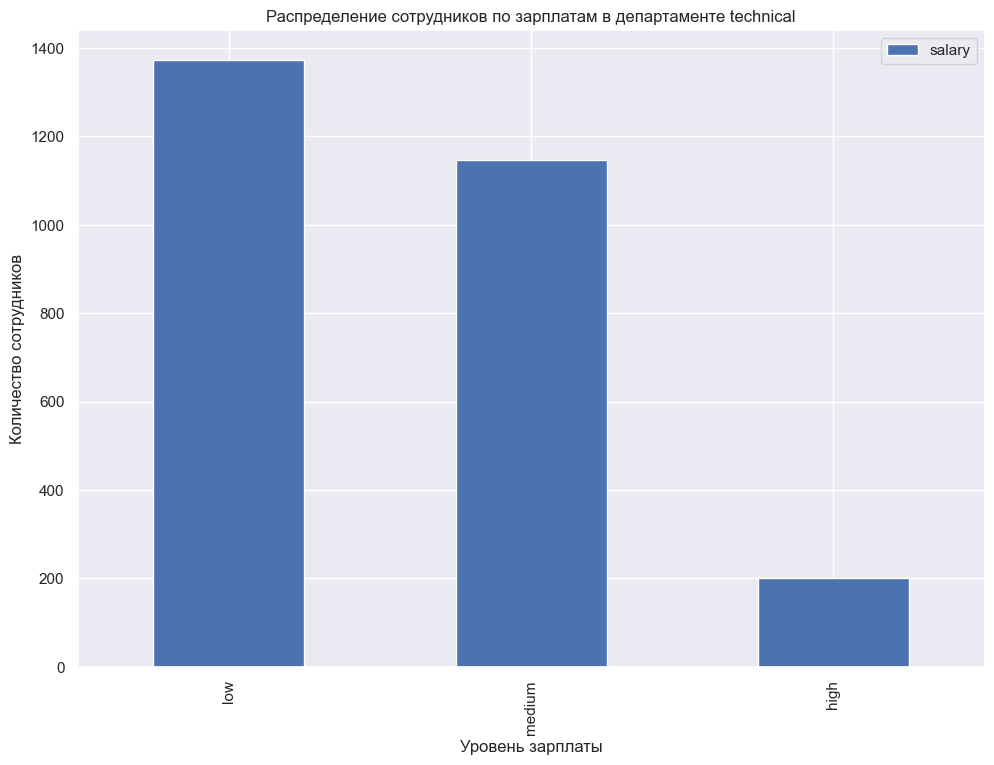

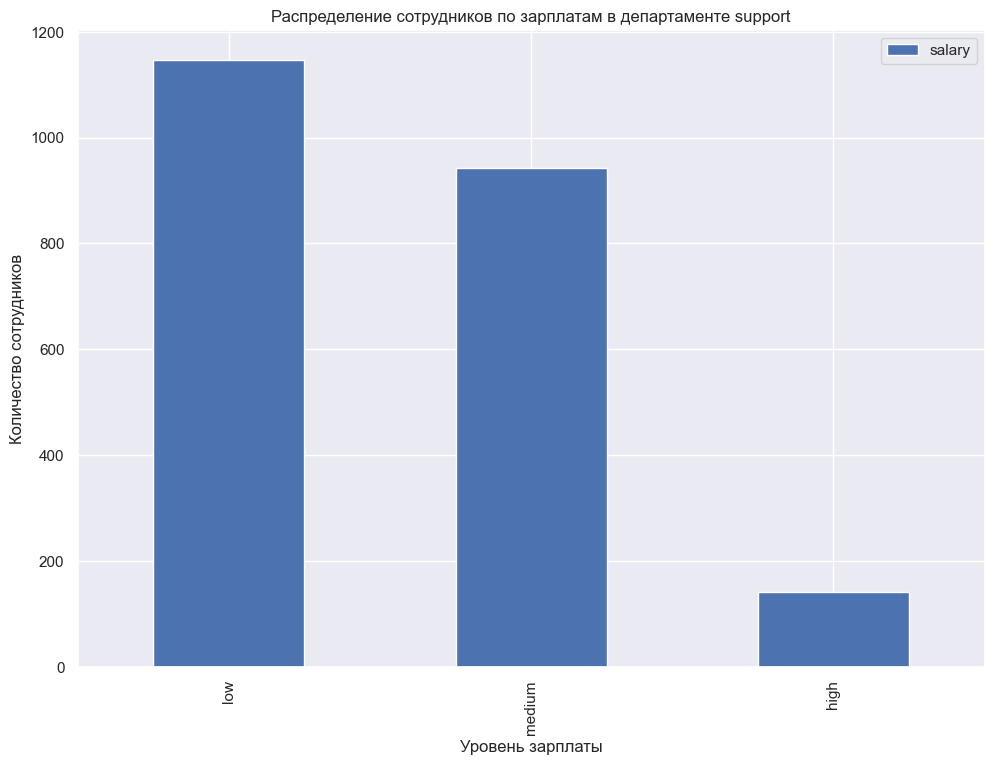

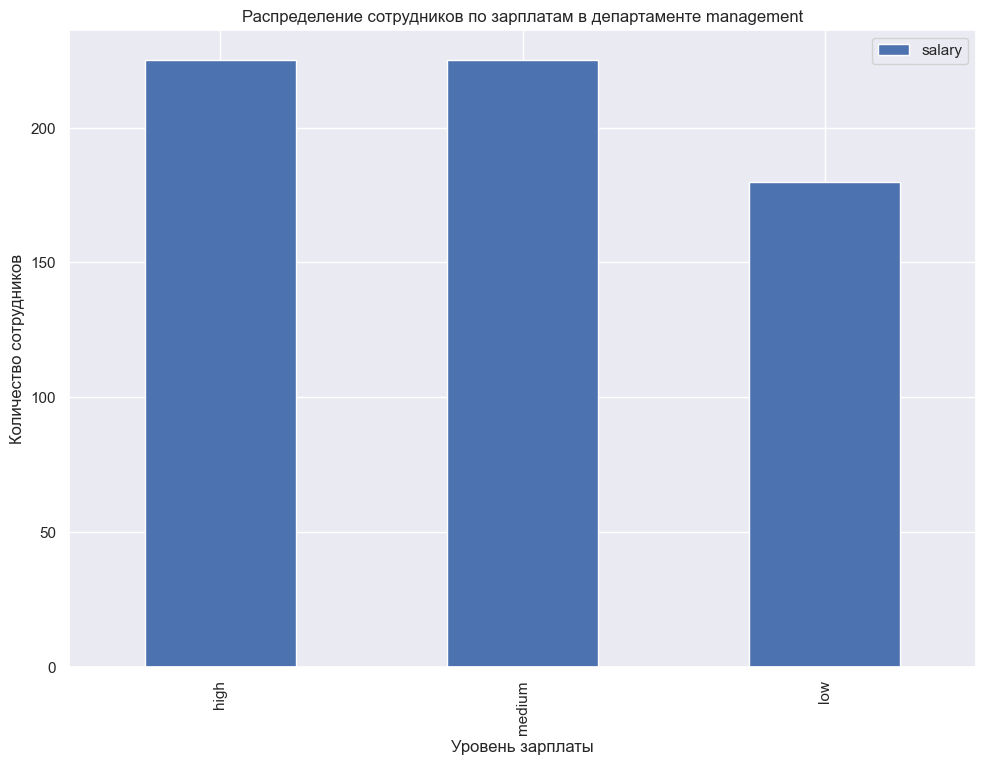

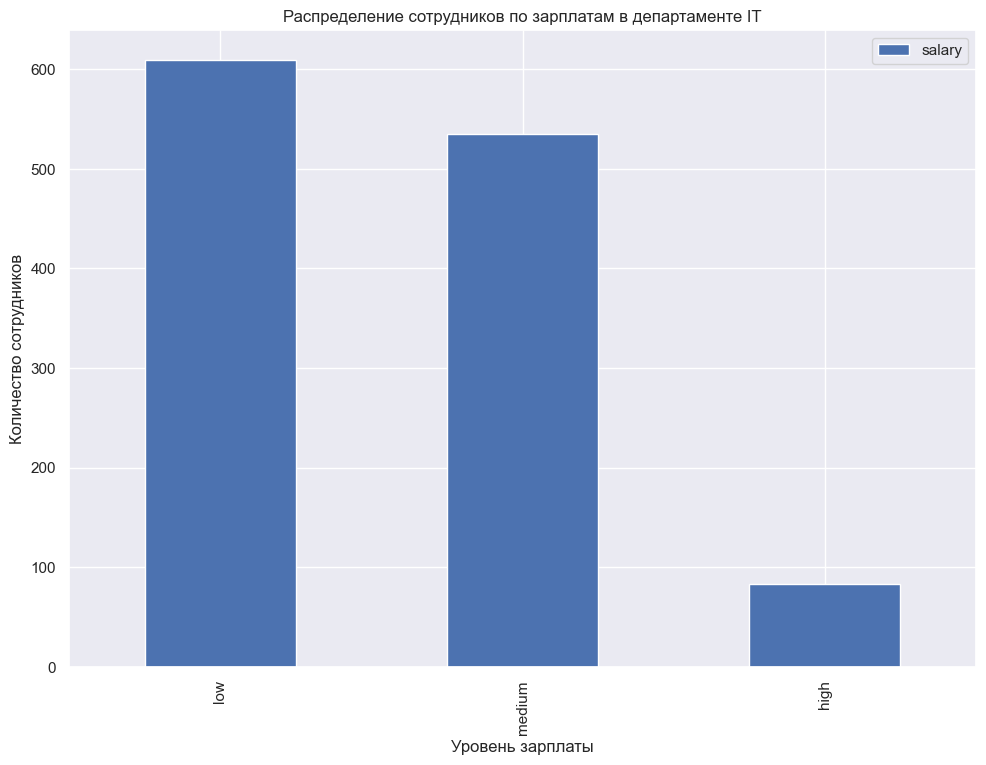

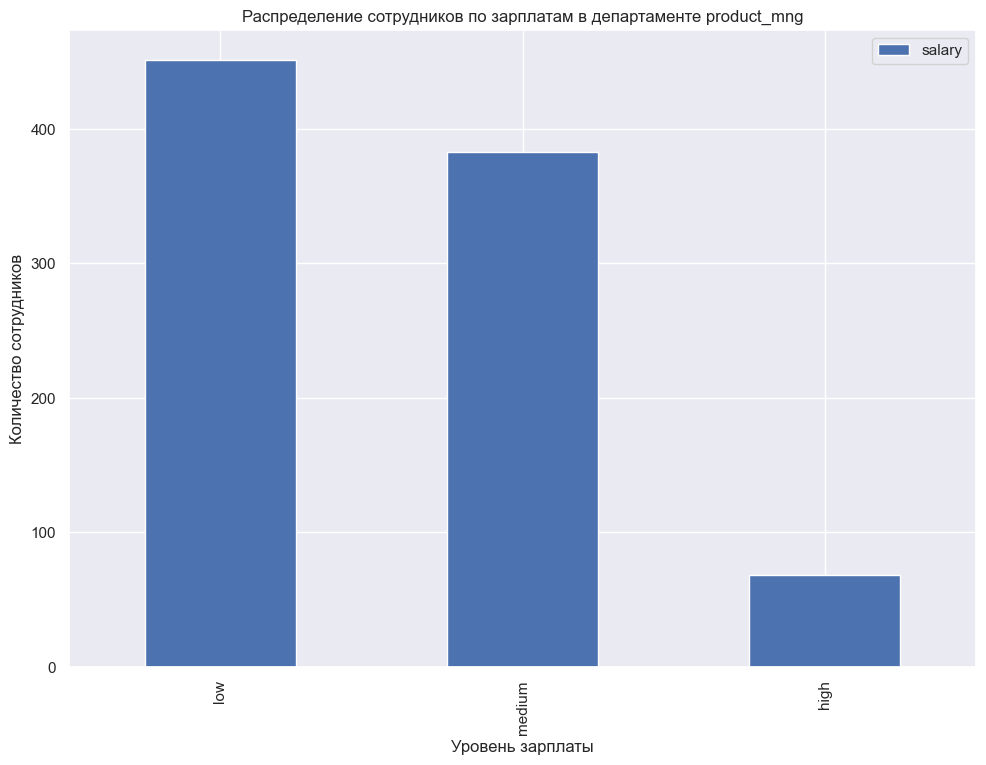

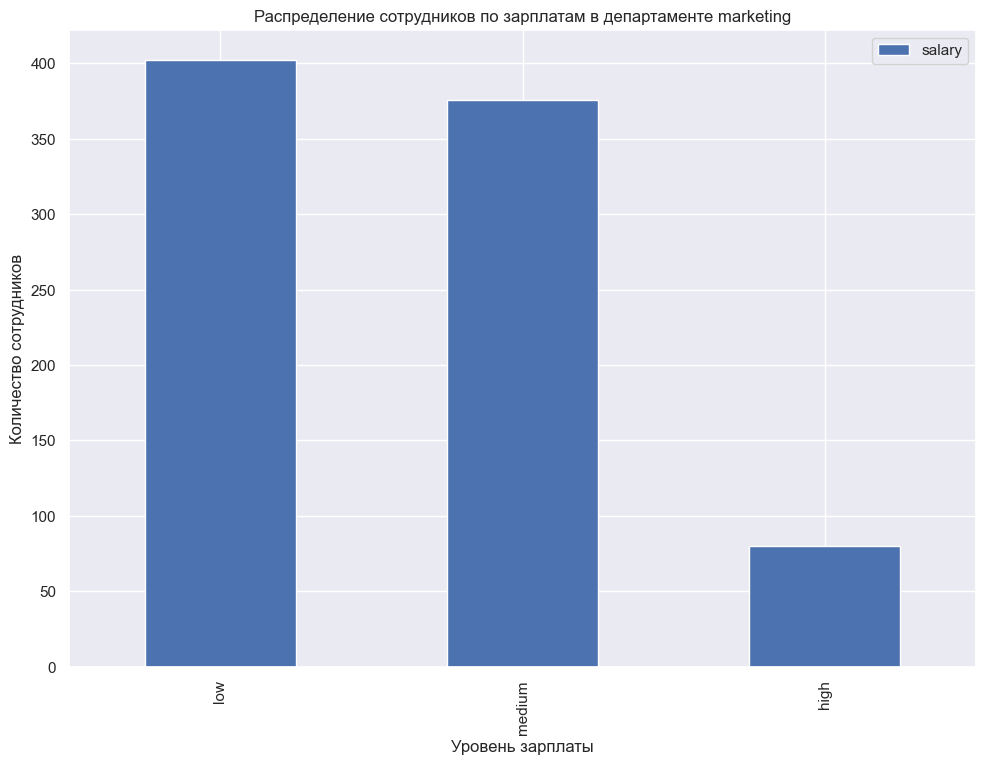

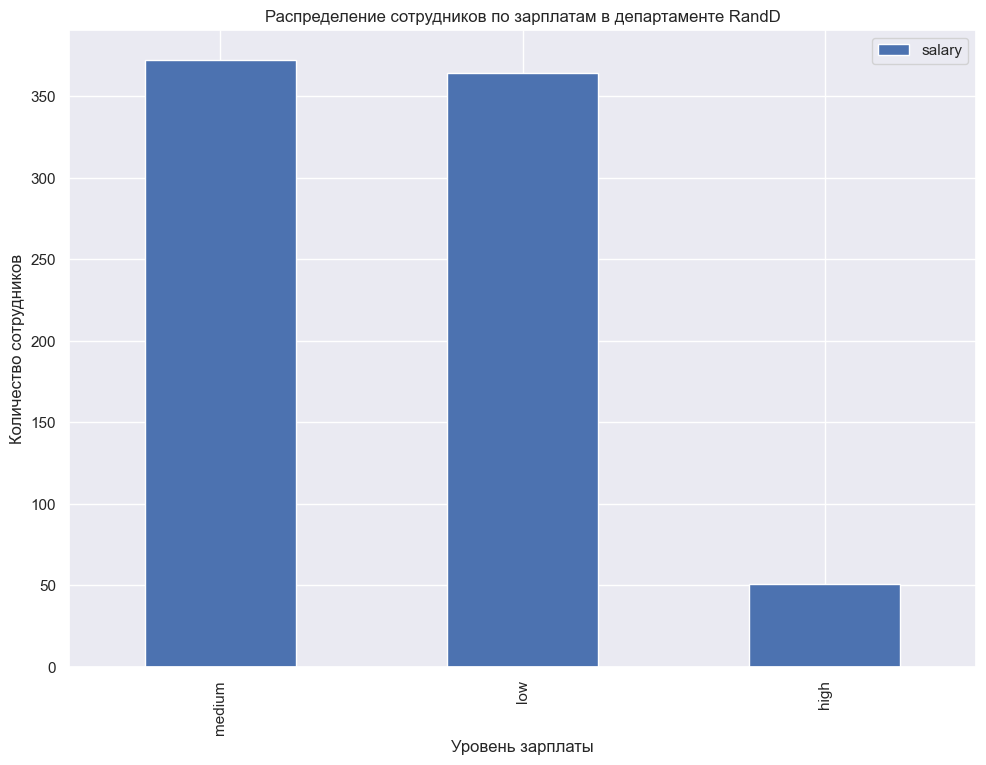

In [17]:
# визуальное представление
for department in hr_data['department'].unique():
    pd.DataFrame(hr_data[hr_data['department'] == department]['salary'].value_counts()).plot(kind='bar', 
                                                                  title= f'Распределение сотрудников по зарплатам в департаменте {department}',
                                                                  xlabel='Уровень зарплаты',
                                                                  ylabel='Количество сотрудников')

In [22]:
# табличное представление

depatment_info = pd.pivot_table(hr_data,
               index=['department'],
               values=['last_evaluation'],
               columns=['salary'],
               aggfunc='count').reset_index()

depatment_info.columns = [name[1] if name[1] else name[0] for name in depatment_info.columns]
                
depatment_info = depatment_info.set_index('department')


<AxesSubplot:xlabel='department'>

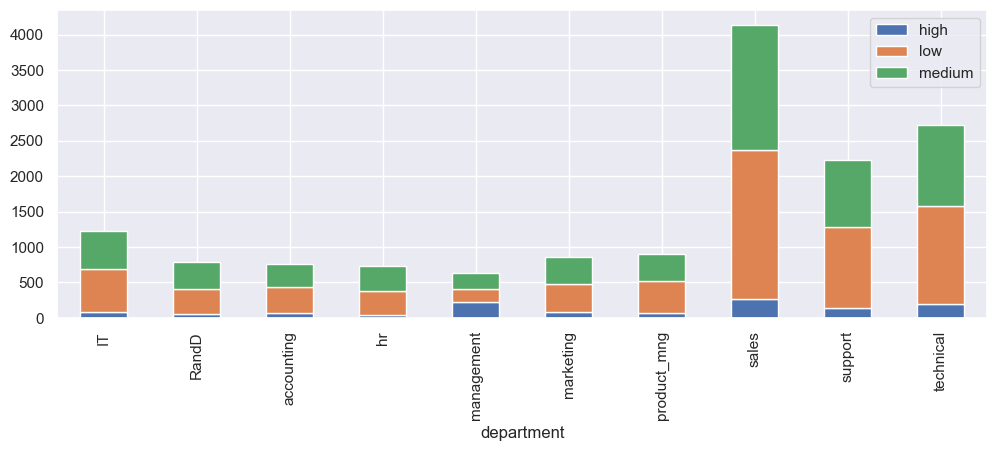

In [23]:
depatment_info.plot(kind='bar', stacked=True, figsize=(12, 4))

## Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [25]:
import scipy.stats as st

In [31]:
low_salary = hr_data[hr_data['salary'] == 'low']['average_montly_hours']
high_salary = hr_data[hr_data['salary'] == 'high']['average_montly_hours']

stat, p = st.mannwhitneyu(low_salary, high_salary)

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые. Уровень заработной платы вероятно не влияет на время проведенное на работе')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются. Уровень заработной платы возможно влияет на время проведенное на работе')

Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые. Уровень заработной платы вероятно не влияет на время проведенное на работе


## Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
-Среднее количество проектов

In [63]:
def promotion_share(data):
    return round(data[data == 1].count()/data.count(),2)

In [81]:
info_left = pd.pivot_table(hr_data,
               index=['left'],
               values=['promotion_last_5years', 'satisfaction_level', 'number_project'],
               aggfunc={'promotion_last_5years': promotion_share, 'satisfaction_level': np.mean, 'number_project': np.mean}).reset_index()

info_left = info_left.set_index('left').round(2)
info_left.rename(columns = {'number_project':'Ср. кол-во проектов', 'promotion_last_5years': 'Доля сотрудников с повыш. за посл. 5 лет', 'satisfaction_level': 'Средняя степень удовлетворенности'}, inplace = True )
info_left

,Ср. кол-во проектов,Доля сотрудников с повыш. за посл. 5 лет,Средняя степень удовлетворенности
left,,,
0,3.79,0.03,0.67
1,3.86,0.01,0.44


## Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Разделить данные на тестовую и обучающую выборки
Оценить качество модели на тестовой выборки

In [125]:
data = hr_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_class = hr_data['left'].to_numpy()

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7482666666666666

In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lda.predict(X_test))

array([[2582,  271],
       [ 673,  224]], dtype=int64)

Мы видим что модель работает не очень хорошо и выдает досточно много ложно-положительных результатов, относительно истино-отрицательных